# Amazon Shure MV7 EDA and Sentement Analysis

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [Fastpages, Jupyter, Python, Selenium, Stoc]
- annotations: true
- hide: false
- image: "https://luminousmen.com/media/exploratory-data-analysis.jpg"
- layout: post
- search_exclude: true

### Required Packages

[wordcloud](https://github.com/amueller/word_cloud), 
[geopandas](https://geopandas.org/en/stable/getting_started/install.html), 
[nbformat](https://pypi.org/project/nbformat/), 
[seaborn](https://seaborn.pydata.org/installing.html), 
[scikit-learn](https://scikit-learn.org/stable/install.html)

![]({{site.baseurl}}/images/diagram.png "https://github.com/fastai/fastpages")

### Now let's get started!
First thing first, you need to load all the necessary libraries:

In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import re
import plotly.graph_objects as go
import seaborn as sns
import random
import plotly.express as px

## Read the Data

In [62]:
#Import Data
df = pd.read_csv("/Users/zeyu/Desktop/DS/Ebay & Amazon/Amazon_reviews_scraping/Amazon_reviews_scraping/full_reviews.csv")
df

,name,stars1,stars2,date,title,review
0,The Brady Report,2.0 out of 5 stars,NaN,"Reviewed in the United States on November 12, ...",Not worth it.,This is Shure trying to bait people into buyin...
1,Billy,5.0 out of 5 stars,NaN,"Reviewed in the United States on October 27, 2020",Outstanding Microphone for Video Calls,I didn't even know that I wanted to sound like...
2,Matthew G.,4.0 out of 5 stars,NaN,"Reviewed in the United States on November 1, 2020","Great, but not an SM7B replacement. Look elsew...",This microphone fits perfectly for my use case...
3,nashing,1.0 out of 5 stars,NaN,"Reviewed in the United States on January 28, 2021",USB users read first!! Very poor micro USB port.,The media could not be loaded. So it kind of ...
4,Alex T,5.0 out of 5 stars,NaN,"Reviewed in the United States on October 27, 2020","Amazing vocal sound, sturdy, but touch control...",I'll start right off by saying that the Shure ...
...,...,...,...,...,...,...
515,Booklover,NaN,4.0 out of 5 stars,"Reviewed in Canada on March 1, 2021",Very effective product,"This arrived in an easy to open, and giftable ..."
516,thychubbz,NaN,5.0 out of 5 stars,"Reviewed in Canada on November 24, 2020",Great voice quality,Whether you have a podcast or you do a lot of ...
517,Crazy Craze,NaN,5.0 out of 5 stars,"Reviewed in Canada on November 20, 2020","Crisp, clean recording",This is a really good microphone that puts eve...
518,Amazon Elite Reviewers,NaN,5.0 out of 5 stars,"Reviewed in Canada on November 17, 2020",Great mic!,The Good- Amazing sound quality- Easy setup- E...


## Data Cleaning

Step 1:
- Splite column Date to Country and Date
- Combine the two rating columns to one
- Convert type of date from string to datetime

In [63]:
#Clean Data
info = []
for i in df["date"]:
    x = re.sub("Reviewed in ", "", i)
    x1 = re.sub(" on ", "*", x)
    info.append(x1)

df["date"] = pd.DataFrame({"date": info})
df[['country','date']] = df.date.apply(
   lambda x: pd.Series(str(x).split("*")))

star = []
star = df.stars1.combine_first(df.stars2)
df["star"] = pd.DataFrame({"star": star})

del df['stars1']
del df['stars2']

#Convert String to Date
df.date = pd.to_datetime(df.date)

In [64]:
df

,name,date,title,review,country,star
0,The Brady Report,2020-11-12,Not worth it.,This is Shure trying to bait people into buyin...,the United States,2.0 out of 5 stars
1,Billy,2020-10-27,Outstanding Microphone for Video Calls,I didn't even know that I wanted to sound like...,the United States,5.0 out of 5 stars
2,Matthew G.,2020-11-01,"Great, but not an SM7B replacement. Look elsew...",This microphone fits perfectly for my use case...,the United States,4.0 out of 5 stars
3,nashing,2021-01-28,USB users read first!! Very poor micro USB port.,The media could not be loaded. So it kind of ...,the United States,1.0 out of 5 stars
4,Alex T,2020-10-27,"Amazing vocal sound, sturdy, but touch control...",I'll start right off by saying that the Shure ...,the United States,5.0 out of 5 stars
...,...,...,...,...,...,...
515,Booklover,2021-03-01,Very effective product,"This arrived in an easy to open, and giftable ...",Canada,4.0 out of 5 stars
516,thychubbz,2020-11-24,Great voice quality,Whether you have a podcast or you do a lot of ...,Canada,5.0 out of 5 stars
517,Crazy Craze,2020-11-20,"Crisp, clean recording",This is a really good microphone that puts eve...,Canada,5.0 out of 5 stars
518,Amazon Elite Reviewers,2020-11-17,Great mic!,The Good- Amazing sound quality- Easy setup- E...,Canada,5.0 out of 5 stars


Step 2:
- Two methods to verify if column "star" contain any NaN
- Converted the type of column "star" from string to Int

In [65]:
"nan" in df['star']

False

In [66]:
df_no_star = df[df['star'].isna()]
df_no_star

,name,date,title,review,country,star


In [67]:
#Convert 2.0 out of 5 stars to 2
df_int = []
#df_with_star["stars"] = [str(x).replace(':',' ') for x in df["stars"]]

for i in df["star"]:
    x = re.sub(".0 out of 5 stars", "", i)
    df_int.append(x)

df["rating"] = pd.DataFrame({"rating": df_int})
df["rating"] = df["rating"].astype(int)
del df['star']

In [68]:
df['name'] = df['name'].str.lower()

In [69]:
df[df['title'].str.contains('great')]

,name,date,title,review,country,rating
29,n. pappas,2021-06-28,Works great with Zoom,"Ok, using this for Zoom is overkill - but I'm ...",the United States,5
57,john gallagher,2021-09-27,Fantastic microphone and great SM7B alternative!,Bought this mic as an alternative to the SM7B ...,the United States,5
151,a. caito,2021-01-23,great step up,It's been a great purchase,the United States,5
157,austin moss,2021-02-16,great mic,wow this is one of the best usb mics i have ev...,the United States,5
169,wla,2021-05-04,"Easy to use, great sound","Excellent mic for podcasting from home. Clean,...",the United States,5
187,remy,2022-01-20,Such a great mic,This is such a great mic to use for podcasters.,the United States,5
191,amazon customer,2021-02-14,great,this is amazing mic,the United States,5
200,peederj,2021-09-23,Ok not as great as the SM7B but a perfect podc...,This mic is a perfect all-in-one podcasting so...,the United States,5
225,justin h.,2021-07-02,"excellent microphone, great alternative to the...",This mic is amazing! Whether you choose to use...,the United States,5
258,r. hart,2022-01-10,Not great unless extremely close to your mouth,Was looking to replace my old AudioTechnica AT...,the United Kingdom,2


## EDA

In [70]:
temp = df['rating'].value_counts()
fig = go.Figure(go.Bar(
            x=temp,
            y=temp.index,
            orientation='h'))

fig.show()

In [71]:
df_country = df['country'].value_counts()
fig = go.Figure(go.Bar(
            x=df_country,
            y=df_country.index,
            orientation='h'))

fig.show()

In [72]:
mean_rating = df['rating'].mean()
mean_rating

4.446153846153846

In [73]:
"""fig = px.line(df, x=temp.index, y=temp.rating, title='Life expectancy in Canada')
fig.show()"""
import plotly.express as px
temp = df.groupby([df['date'].dt.date]).mean()
temp

,rating
date,
2020-10-26,5.000000
2020-10-27,5.000000
2020-10-29,5.000000
2020-11-01,4.333333
2020-11-02,5.000000
...,...
2022-01-24,5.000000
2022-01-25,5.000000
2022-01-26,3.000000


<AxesSubplot:xlabel='date'>

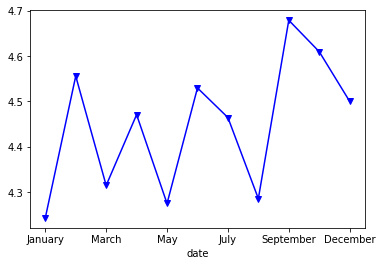

In [74]:
#Average rating each month
temp = df.groupby(df['date'].dt.strftime('%B'))['rating'].mean().sort_values()
order_temp = temp.reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "November", "December"])
order_temp.plot(marker="v", linestyle="-", color = "b")

<AxesSubplot:xlabel='date'>

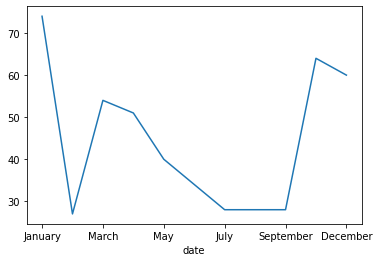

In [75]:
#Quantity of reviews in each month.
temp = df.groupby(df['date'].dt.strftime('%B'))['rating'].count().sort_values()
order_temp = temp.reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "November", "December"])
order_temp.plot()

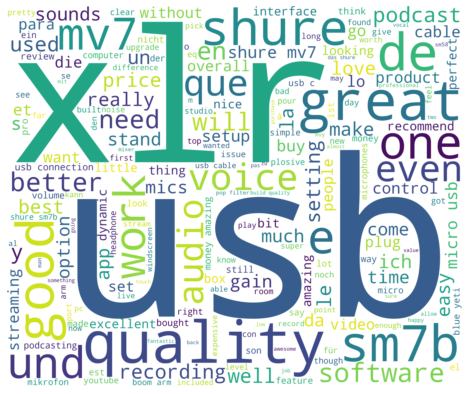

In [78]:
#Many words are useless so create a stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Mic", "Microphone", "using","sound","use"])


def cleaned_visualise_word_map(x):
    words=" "
    for msg in x:
        msg = str(msg).lower()
        words = words+msg+" "
    wordcloud = WordCloud(stopwords = stopwords, width=3000, height=2500, background_color='white').generate(words)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 14
    fig_size[1] = 7
    #Display image appear more smoothly
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show(wordcloud)

cleaned_visualise_word_map(df["review"])

## Sentiment Analysis 1

In [79]:
df = df[df['rating'] != 3]
df['sentiment'] = df['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [83]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [93]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="deepskyblue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

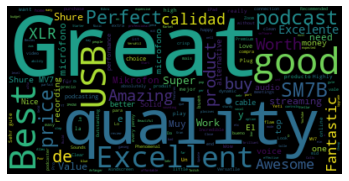

In [26]:
stopwords = set(STOPWORDS)
stopwords.update(["Mic", "Microphone", "using", "sound", "use", "Micro"]) 

## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

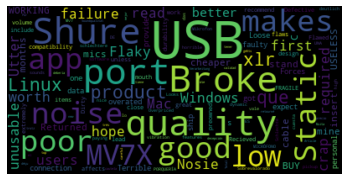

In [27]:
pos = " ".join(review for review in negative.title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

df['review'] = df['review'].apply(remove_punctuation)
df = df.dropna(subset=['title'])
df['title'] = df['title'].apply(remove_punctuation)

/var/folders/v6/7t9rdt6n6kzb6x_wn2bpnmwm0000gn/T/ipykernel_10630/1359415573.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
dfNew = df[['title','sentiment']]
dfNew.head()

,title,sentiment
0,Not worth it,-1
1,Outstanding Microphone for Video Calls,1
2,"Great, but not an SM7B replacement Look elsewh...",1
3,USB users read first Very poor micro USB port,-1
4,"Amazing vocal sound, sturdy, but touch control...",1


In [36]:
dfLong = df[['review','sentiment']]
dfLong.head()

,review,sentiment
0,This is Shure trying to bait people into buyin...,-1
1,I didn't even know that I wanted to sound like...,1
2,This microphone fits perfectly for my use case...,1
3,The media could not be loaded So it kind of g...,-1
4,I'll start right off by saying that the Shure ...,1


In [37]:
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [38]:
#change df frame to a bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

[Vectorizer](https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af) &
[Bag-of-Words](https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af)


In [39]:
train_matrix = vectorizer.fit_transform(train['title'])
test_matrix = vectorizer.transform(test['title'])

In [40]:
train_matrix_l = vectorizer.fit_transform(train['review'])
test_matrix_l = vectorizer.transform(test['review'])

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [42]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [48]:
X_train_l = train_matrix_l
X_test_l = test_matrix_l
y_train_l = train['sentiment']
y_test_l = test['sentiment']

In [49]:
lr.fit(X_train,y_train)

LogisticRegression()

In [50]:
predictions = lr.predict(X_test)

In [51]:
lr.fit(X_train_l,y_train_l)

LogisticRegression()

In [52]:
predictions_l = lr.predict(X_test_l)

In [53]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix, classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 1,  0],
       [11, 93]])

In [54]:
long = np.asarray(y_test_l)
confusion_matrix(predictions_l,y_test_l)

array([[ 0,  0],
       [12, 93]])

In [55]:
print(classification_report(predictions,y_test))
#0.90 Accuracy

              precision    recall  f1-score   support

          -1       0.08      1.00      0.15         1
           1       1.00      0.89      0.94       104

    accuracy                           0.90       105
   macro avg       0.54      0.95      0.55       105
weighted avg       0.99      0.90      0.94       105



In [56]:
print(classification_report(predictions_l,y_test_l))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.89      0.94       105

    accuracy                           0.89       105
   macro avg       0.50      0.44      0.47       105
weighted avg       1.00      0.89      0.94       105



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

